In [1]:
#Data pre-processing
import numpy as np    
import pandas as pd

#Data visualzation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px# functions to visualize a variety of types of data. 

#Prediction scores
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix #used to define the performance of a classification algorithm

#machine learning algorithms
from sklearn.model_selection import KFold,StratifiedKFold #Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from keras.utils.np_utils import to_categorical #Converts a class vector (integers) to binary class matrix.
from sklearn.metrics import log_loss #loss functions are a measurement of how good your model is in terms of predicting the expected outcome.
from sklearn import linear_model #contain different functions for performing machine learning with linear models 


In [2]:
#importing the dataset
train_df=pd.read_csv('train_data.csv')

In [3]:
#Datasets columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_id               20000 non-null  object 
 1   memory_GB            20000 non-null  float64
 2   network_log10_MBps   20000 non-null  float64
 3   local_IO_log10_MBps  20000 non-null  float64
 4   NFS_IO_log10_MBps    20000 non-null  float64
 5   failed               20000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 937.6+ KB


In [4]:
#Dataset Size
print(train_df.shape)

(20000, 6)


<AxesSubplot:xlabel='failed', ylabel='count'>

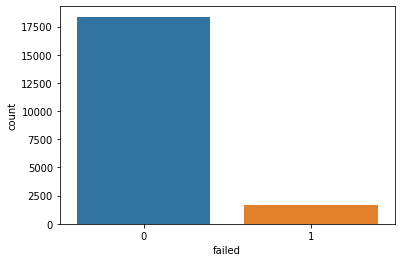

In [5]:
#Dataset visualization 
import seaborn as sns
sns.countplot(x="failed", data = train_df)#it shows the counts of observations in each categorical bin using bars.

In [6]:
#iloc-helps us select a specific row or column from the data set.
X = train_df.iloc[:, 1:5] #Independent columns
y = train_df.iloc[:,5]# dependent columns

In [7]:
#Dataset preprocessing 
#Dataset divided into train dataset ,test dataset
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       memory_GB  network_log10_MBps  local_IO_log10_MBps  NFS_IO_log10_MBps
18960    58.5105              3.4041               1.0371             2.3446
11353    58.8871              3.2899               0.0202             2.1375
7449      7.4443              2.9744              -0.2275            -3.0000
14308    14.7109              3.3976               0.0752            -2.9991
11889    11.4374             -1.7290              -0.8051            -3.0000
...          ...                 ...                  ...                ...
10955    11.2478             -0.5710              -0.4325            -3.0000
17289     5.0395              2.6215              -1.0525            -0.9499
5192    400.0972              3.9525               0.5470            -2.7431
12172     5.2083              1.2176               0.7686            -3.0000
235      66.2146              3.4434              -0.3105             1.9501

[15000 rows x 4 columns]
       memory_GB  network_log10_MBps  local_IO_log

In [8]:
# now we reshape train,test dataset .
X_train = X_train.values
X_test = X_test.values
print(X_train)
print(X_test)
print(X_train.shape[1])
print(X_test.shape[1])

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)
print(X_train)
print(X_test)

[[ 5.851050e+01  3.404100e+00  1.037100e+00  2.344600e+00]
 [ 5.888710e+01  3.289900e+00  2.020000e-02  2.137500e+00]
 [ 7.444300e+00  2.974400e+00 -2.275000e-01 -3.000000e+00]
 ...
 [ 4.000972e+02  3.952500e+00  5.470000e-01 -2.743100e+00]
 [ 5.208300e+00  1.217600e+00  7.686000e-01 -3.000000e+00]
 [ 6.621460e+01  3.443400e+00 -3.105000e-01  1.950100e+00]]
[[ 4.356470e+01  2.850000e+00 -9.284000e-01 -3.000000e+00]
 [ 4.253533e+02  8.920000e-02  6.655000e-01 -2.989900e+00]
 [ 2.295540e+01  3.143500e+00  6.640000e-02 -7.369000e-01]
 ...
 [ 1.042880e+01  2.009400e+00 -7.203000e-01 -7.222000e-01]
 [ 3.223890e+01 -7.660000e-01  5.750000e-01 -2.994300e+00]
 [ 9.754000e+00 -1.554200e+00 -1.196500e+00 -1.751500e+00]]
4
4
[[[ 5.851050e+01]
  [ 3.404100e+00]
  [ 1.037100e+00]
  [ 2.344600e+00]]

 [[ 5.888710e+01]
  [ 3.289900e+00]
  [ 2.020000e-02]
  [ 2.137500e+00]]

 [[ 7.444300e+00]
  [ 2.974400e+00]
  [-2.275000e-01]
  [-3.000000e+00]]

 ...

 [[ 4.000972e+02]
  [ 3.952500e+00]
  [ 5.470000

In [9]:
#return size,shape,dimensions of the dataframe
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[2])

(15000, 4, 1)
(5000, 4, 1)
1


Convert the Target label to categorical

In [10]:
target_train = y_train
target_test = y_test
Y_train=to_categorical(target_train)
Y_test=to_categorical(target_test)

In [11]:
print(Y_train)
print(Y_train.shape)
print(Y_test.shape)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
(15000, 2)
(5000, 2)


Performance Evaluation Function

In [12]:
#To find the accuracy,precision,f1score for each algorithms
def showResults(test, pred):
    #For Example target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)

# KFold Validation

In [13]:
tempX=train_df.iloc[:,1:5].values
tempY=train_df.iloc[:,5].values
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
a = []
p=[]
f1=[]

for train_index, val_index in skf.split(X_train, target_train):
    X_train, X_valcv = tempX[train_index], tempX[val_index]
    Y_train, Y_valcv = tempY[train_index], tempY[val_index]
    lr.fit(X_train,Y_train)
    ypred=lr.predict(X_train)
    a.append(accuracy_score(Y_train,ypred))
    p.append(precision_score(Y_train,ypred,average='weighted'))
    f1.append(f1_score(Y_train,ypred,average='weighted'))
    showResults(Y_train,ypred)
a.sort()
p.sort()
f1.sort()
max1=a[0]
for i in range(len(a)):
    if a[i]>max1:
        max1=a[i]
print(i)
print(f'Max accuracy:{a[i]}')
print(f'Max precision:{p[i]}')
print(f'Max f1_score:{f1[i]}')
    
print('List of possible accuracy:', a)
print('List of possible precision:', p)
print('List of possible f1_score:', f1)
# print('\nMaximum Accuracy That can be obtained from this model is:',max(lst_accu_stratified)*100, '%')
# print('\nMinimum Accuracy:',min(lst_accu_stratified)*100, '%')
# print('\nOverall Accuracy:',mean(lst_accu_stratified)*100, '%')


C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  : 0.91825
Precision : 0.8431830625000001
f1Score : 0.8791169685911638
Loss : 2.823544970283949
[[11019     0]
 [  981     0]]
Accuracy  : 0.9180833333333334
Precision : 0.8428770069444445
f1Score : 0.8788742306411202
Loss : 2.829301433016434
[[11017     0]
 [  983     0]]


C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  : 0.92075
Precision : 0.8477805624999999
f1Score : 0.8827599245086555
Loss : 2.7371980292966716
[[11049     0]
 [  951     0]]
Accuracy  : 0.9223333333333333
Precision : 0.8506987777777778
f1Score : 0.8850689555517021
Loss : 2.6825116333380636
[[11068     0]
 [  932     0]]
Accuracy  : 0.9199166666666667
Precision : 0.8462466736111112
f1Score : 0.8815452131892298
Loss : 2.765980342959098
[[11039     0]
 [  961     0]]
4
Max accuracy:0.9223333333333333
Max precision:0.8506987777777778
Max f1_score:0.8850689555517021
List of possible accuracy: [0.9180833333333334, 0.91825, 0.9199166666666667, 0.92075, 0.9223333333333333]
List of possible precision: [0.8428770069444445, 0.8431830625000001, 0.8462466736111112, 0.8477805624999999, 0.8506987777777778]
List of possible f1_score: [0.8788742306411202, 0.8791169685911638, 0.8815452131892298, 0.8827599245086555, 0.8850689555517021]


C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hidden Markov Model

In [14]:
from hmmlearn.hmm import GaussianHMM
hmm = GaussianHMM(n_components=2)#the filtering, smoothing, forecasting, evaluating, decoding, and learning problems
hmm.fit(X)
predictions = hmm.predict(X)
print("*Confusion Matrix for HMM: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for HMM: 
[[15790  2584]
 [ 1461   165]]


In [15]:
print("*Classification report for HMM: ")
print(classification_report(y, predictions))

*Classification report for HMM: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     18374
           1       0.06      0.10      0.08      1626

    accuracy                           0.80     20000
   macro avg       0.49      0.48      0.48     20000
weighted avg       0.85      0.80      0.82     20000



In [16]:
val3 = accuracy_score(y, predictions) *100
print(val3)

79.77499999999999


In [17]:
#logistic regression uses a logistic function and the perceptron uses a step function.

In [18]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.65,random_state=1) 
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),#each element represents one layer and its value represents the number of neurons on each hidden layer
                    learning_rate_init=0.01)# It used to controls the step-size in updating the weights.

# Fit data onto the model
clf.fit(X_train,y_train)#takes the training data as arguments, which can be two arrays in supervised learning.
ypred=clf.predict(X_test)#predict the label of a new set of data

showResults(y_test,ypred)

Accuracy  : 0.9363846153846154
Precision : 0.9358868801432731
f1Score : 0.919186139927476
Loss : 2.1971988361643984
[[11901    21]
 [  806   272]]


In [19]:
a=[]
p=[]
f1=[]
learning_rate=[]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5,random_state=1) 
def different_rates():    
    s=np.linspace(0.01,0.1,5)# tool in Python for creating numeric sequences
    l=[]
    
    
    t=[0.3,0.4,0.5,0.6,0.7] #test sizes
    for i in s:
        l.append(float('{:.2f}'.format(i)))
    for j in l:
            
            clf1 = MLPClassifier(hidden_layer_sizes=(6,5),
                    #each element represents one layer and its value represents the number of neurons on each hidden layer
                    learning_rate_init=j)# It used to controls the step-size in updating the weights.
    
            learning_rate.append(j)
            clf1.fit(X_train,y_train)#takes the training data as arguments, which can be two arrays in supervised learning.
            ypred=clf1.predict(X_test)#predict the label of a new set of data
            a.append(accuracy_score(y_test,ypred))
            p.append(precision_score(y_test,ypred, average='weighted'))

            f1.append(f1_score(y_test,ypred, average='weighted'))
different_rates()





C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<module 'matplotlib.pyplot' from 'C:\\Users\\saipa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


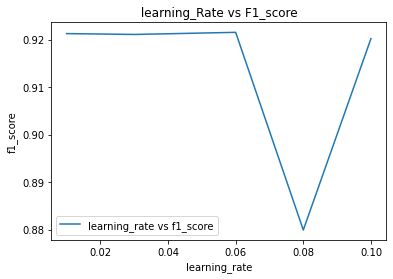

In [20]:
plt.plot(learning_rate,f1,label='learning_rate vs f1_score')
plt.xlabel("learning_rate")
plt.ylabel("f1_score")
print(plt)

plt.title(' learning_Rate vs F1_score ')  
plt.legend()# show a legend on the plot
plt.show()# function to show the plot


In [21]:
a=[]
p=[]
f1=[]
Test_rate=[]
def different_rates():    
    s=np.linspace(0.01,0.1,5)# tool in Python for creating numeric sequences
    l=[]
    
    
    t=[0.3,0.4,0.5,0.6,0.7] #test sizes
    for i in s:
        l.append(float('{:.2f}'.format(i)))
    clf1 = MLPClassifier(hidden_layer_sizes=(6,5),
            #each element represents one layer and its value represents the number of neurons on each hidden layer
            learning_rate_init=0.08)# It used to controls the step-size in updating the weights.
    
    for i in t:
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=i,random_state=1) 
        Test_rate.append(i)
                                    
        clf1.fit(X_train,y_train)# Fit data onto the model      
        ypred=clf1.predict(X_test) #takes the training data as arguments, which can be two arrays in supervised learning.
        a.append(accuracy_score(y_test,ypred))
        p.append(precision_score(y_test,ypred, average='weighted'))
        f1.append(f1_score(y_test,ypred, average='weighted'))
different_rates()

C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<module 'matplotlib.pyplot' from 'C:\\Users\\saipa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


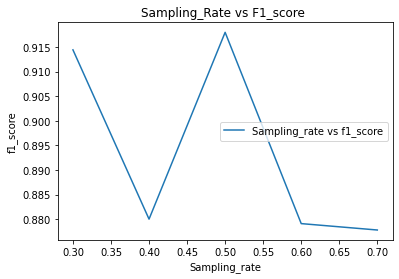

In [22]:
plt.plot(Test_rate,f1,label='Sampling_rate vs f1_score')
plt.xlabel("Sampling_rate")
plt.ylabel("f1_score")
print(plt)
plt.title('Sampling_Rate vs F1_score ')
plt.legend()# show a legend on the plot  
plt.show()# function to show the plot
